Importing required libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Getting Insights from the data

In [169]:
titanic_data=pd.read_csv("/content/titanic_data.csv")

In [170]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [171]:
print(titanic_data.shape)

(891, 21)


In [172]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [173]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

Data Preprocessing and Visualisation

In [174]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [175]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

In [176]:
titanic_data=titanic_data.drop(columns=['WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Body','Class'],axis=1)

In [177]:
titanic_data=titanic_data.drop(columns='Lifeboat',axis=1)

In [178]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [179]:
titanic_data=titanic_data.drop(columns='Ticket',axis=1)

In [180]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [181]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [182]:
print(titanic_data['Embarked'].mode()[0])

S


In [183]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [184]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [185]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
titanic_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [187]:
sb.set()

<Axes: xlabel='Survived', ylabel='count'>

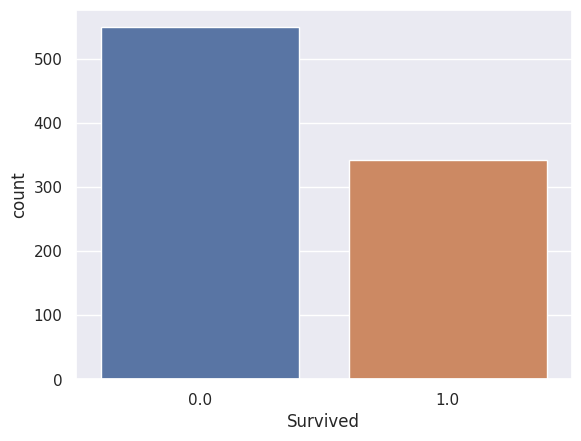

In [188]:
sb.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

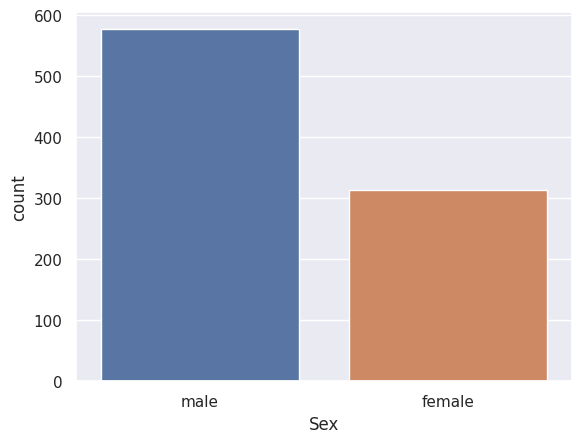

In [189]:
sb.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

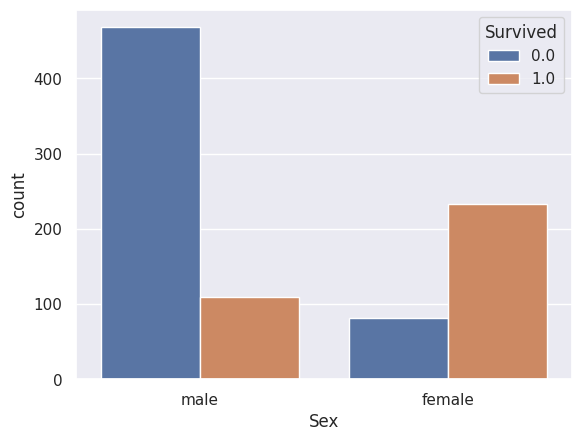

In [190]:
sb.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

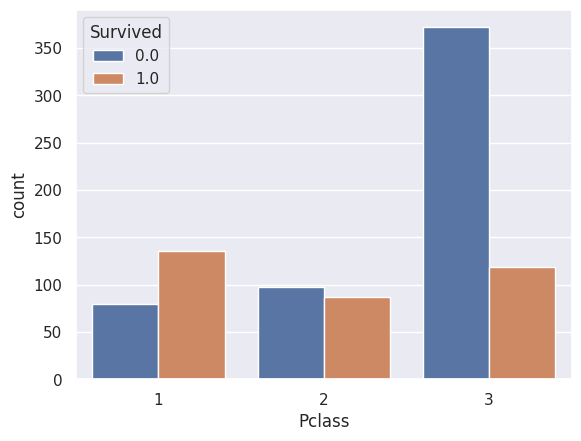

In [191]:
sb.countplot(x='Pclass',hue='Survived',data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

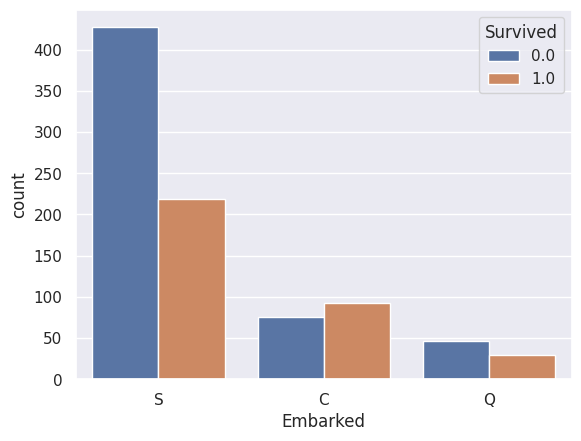

In [192]:
sb.countplot(x='Embarked',hue='Survived',data=titanic_data)

In [193]:
titanic_data=titanic_data.drop(columns=['PassengerId','Name'],axis=1)

In [194]:
print(titanic_data.isnull().sum(),titanic_data.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 (891, 8)


In [195]:
titanic_data['family']=titanic_data['SibSp']+titanic_data['Parch']+1

In [196]:
titanic_data['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [197]:
titanic_data[titanic_data['family']==1]['Survived'].value_counts()

0.0    374
1.0    163
Name: Survived, dtype: int64

In [198]:
titanic_data.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [199]:
def div(number):
  if number==1:
    return "Alone"
  elif number>1 and number<5:
    return "Medium"
  else:
    return "Large"

In [200]:
titanic_data['family_size']=titanic_data['family'].apply(div)

In [201]:
titanic_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,0.0,3,male,22.0,1,0,7.2500,S,2,Medium
1,1.0,1,female,38.0,1,0,71.2833,C,2,Medium
2,1.0,3,female,26.0,0,0,7.9250,S,1,Alone


In [202]:
titanic_data.drop(columns=['SibSp','Parch','family'],inplace=True)

In [203]:
titanic_data=pd.get_dummies(titanic_data,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [204]:
titanic_data.shape

(891, 10)

Splitting the data

In [205]:
X = titanic_data.iloc[:,1:].values
Y = titanic_data.iloc[:,0].values

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [207]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


Training and evaluation of model with logistic regression

---



In [208]:
logreg = LogisticRegression()

In [209]:
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
Y_train_logregpred = logreg.predict(X_train)

In [211]:
print(Y_train_logregpred)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [228]:
train_logreg_accuracy = accuracy_score(Y_train, Y_train_logregpred)
print('Accuracy score of training data with logistic regression : ', train_logreg_accuracy)

Accuracy score of training data with log reg :  0.824438202247191


In [213]:
Y_logregpred = logreg.predict(X_test)

In [214]:
print(Y_logregpred)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]


In [229]:
logreg_accuracy = accuracy_score(Y_test, Y_logregpred)
print('Accuracy score of test data with logistic regression : ', logreg_accuracy)

Accuracy score of test data with log reg :  0.7821229050279329


In [216]:
confusion_matrix(Y_test,Y_logregpred)

array([[88, 12],
       [27, 52]])

In [217]:
print(classification_report(Y_test,Y_logregpred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       100
         1.0       0.81      0.66      0.73        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



Training and evaluation of model with Random Forest Classifier

In [218]:
rf=RandomForestClassifier(n_estimators=100)

In [219]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [220]:
Y_train_rfpred = rf.predict(X_train)

In [221]:
print(Y_train_rfpred)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [227]:
train_rfaccuracy = accuracy_score(Y_train, Y_train_rfpred)
print('Accuracy score of training data with random forest classifier : ', train_rfaccuracy)

Accuracy score of rf training data :  0.9859550561797753


In [223]:
Y_rfpred = rf.predict(X_test)

In [224]:
rfaccuracy = accuracy_score(Y_test, Y_rfpred)
print('Accuracy score of test data with random forest classifier : ', rfaccuracy)

Accuracy score of test data :  0.8156424581005587


In [225]:
confusion_matrix(Y_test,Y_rfpred)

array([[88, 12],
       [21, 58]])

In [226]:
print(classification_report(Y_test,Y_rfpred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       100
         1.0       0.83      0.73      0.78        79

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179

